<a class="anchor" id="toc"> </a>
<b><font size="6"  color='#98F527'>Data Pre-Processing Project</font></b><br><br>
#### Group Members 
- Afonso Fernandes / 20241710
- Antonio Paul / 2024
- Lourenço Lima / 20241711
- Pedro Jorge / 20241819
- Gabriel / 2024
## Introduction
This document presents the City Hospital,  Data Preprocessing & Exploratory Analysis project.  
The core objective of City Hospital is to enhance patient care and operational efficiency by leveraging the data collected from its various departments. Our work addresses this need by transforming the raw patient interaction data into a structured and clean format suitable for advanced analytics.  

<font size="5"> <b>Part A</b> Data Understanding & Cleaning

This section focuses on data quality by addressing missing values, inconsistent values and types, and handling extreme outliers to ensure a reliable foundation for analysis.

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [152]:
data=pd.read_excel("Project Data.xlsx")
data

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.000000
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.000000
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.000000
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.000000
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,1013,92.0,Female,Dublin,Retired,NaN,Cancer,Undergraduate,Divorced,2024-06-28,General Practice,74,2,52082.0,75.489076,52.842353
10004,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-05-13,General Practice,79,6,0.0,66.634595,0.000000
10005,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-01-19,General Practice,96,6,0.0,55.060415,0.000000
10006,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-05-24,General Practice,99,6,0.0,50.322583,0.000000


### Outlier Identification

The first step in the data understanding process was to examine the distribution of the numeric variables. To do this, boxplots were generated for each numeric feature. Boxplots allow us to visually identify potential outliers by highlighting values that fall outside the interquartile range (IQR). This initial inspection helps determine which variables may require further outlier handling or transformation.


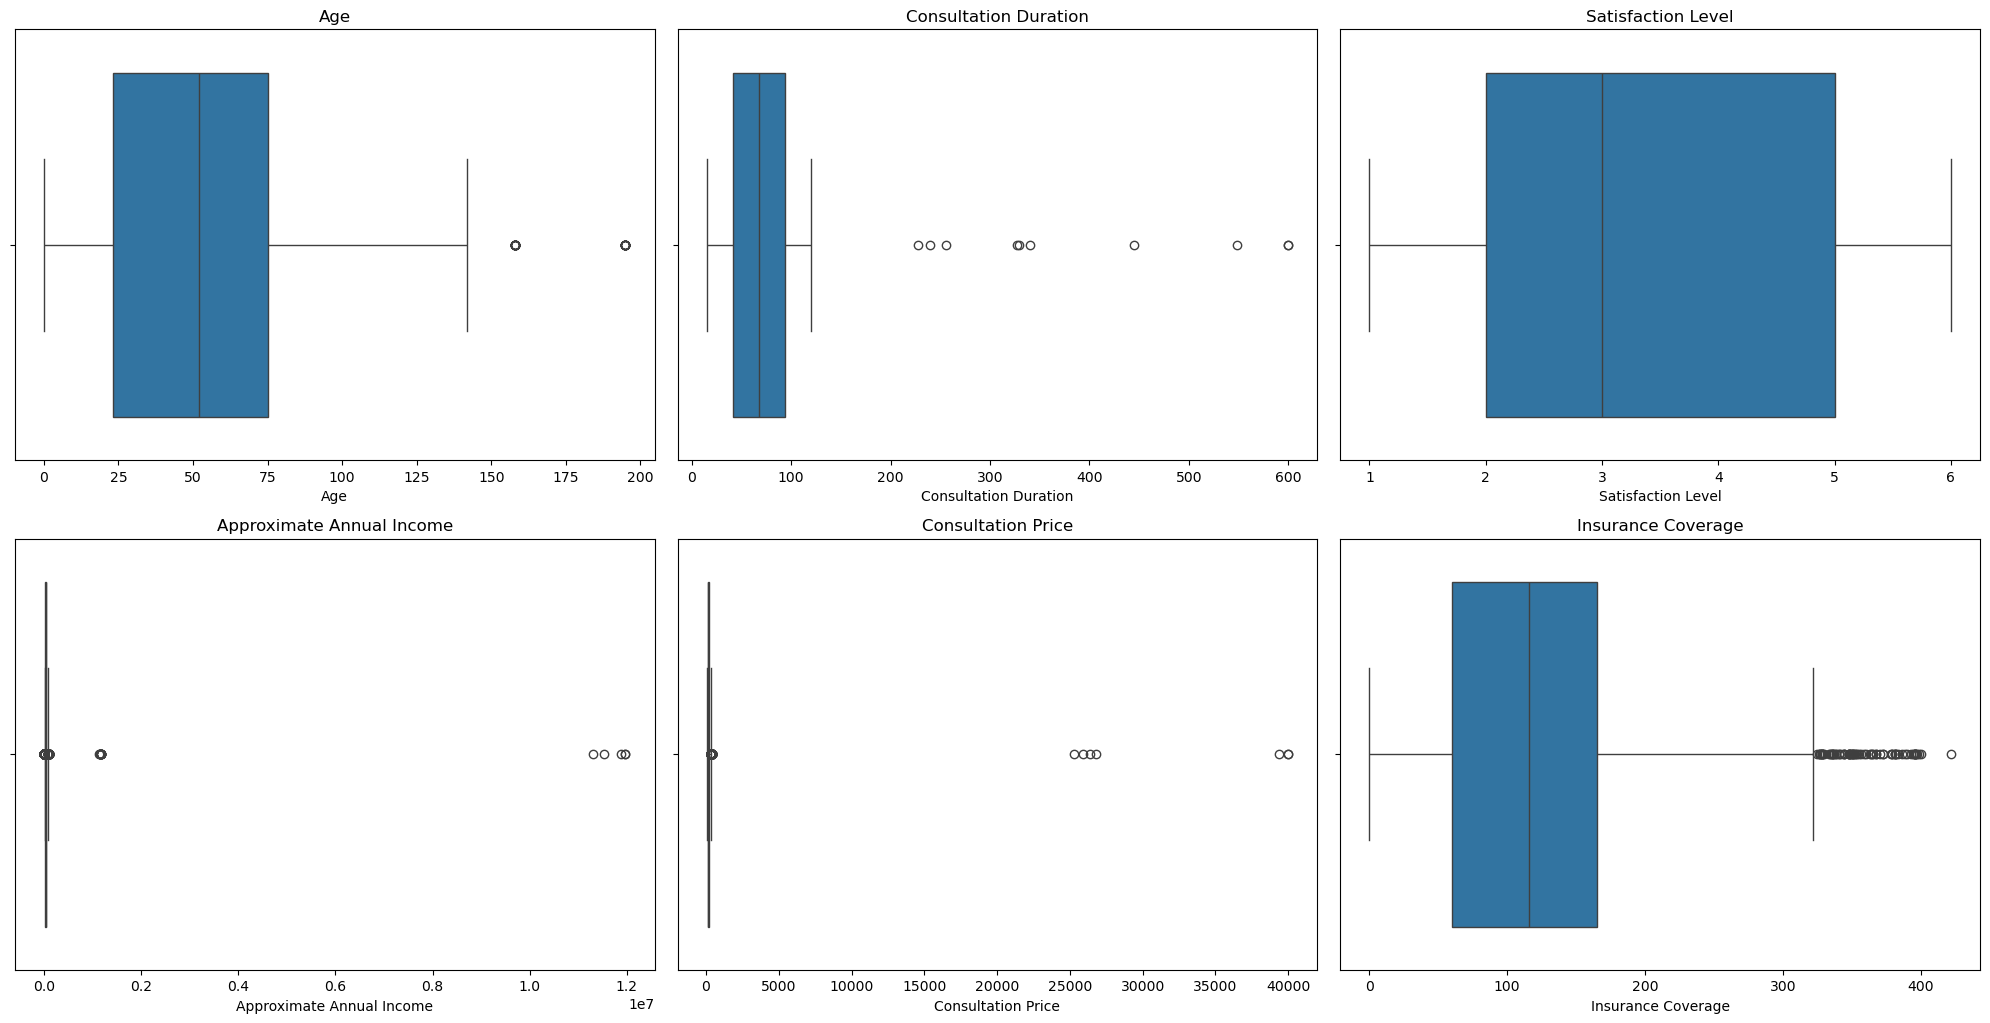

In [153]:
numeric_cols = data.select_dtypes(include='number').columns[1:]


plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):

    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(data=data,x=col)
    
    plt.title(col)
plt.tight_layout()


plt.show()

### Outlier Filtering Using the IQR Method

To handle outliers, we wanted both a better understanding of all features and a consistent, automated way to identify extreme values.  
For this purpose, we developed the function `detect_outliers_2`.  

- The function takes a single column as input and identifies which observations are outliers using the Interquartile Range (IQR) method.  
- It returns a list of row indices corresponding to the outlier values.  
- We then locate these rows in the dataframe and replace the outlier values with `NaN`.  

This approach provides a standardized method for outlier handling across multiple numeric features.

In [154]:
def detect_outliers_2(col):

    feature_q1 = col.quantile(0.25)
    feature_q3 = col.quantile(0.75)
    feature_iqr = feature_q3-feature_q1
    l_bound = feature_q1 - 1.5* feature_iqr
    u_bound = feature_q3 + 1.5*feature_iqr
    outliers = list(col[(~col.between(l_bound,u_bound))&(~col.isna())].index)
        
    return outliers

### Correcting Age Typos

While examining the `Age` column, we observed that some values were likely **typos**, as they were unrealistically high.  
Upon inspection, we noticed that **removing the first digit** from these values often produced ages that aligned with expected ranges and were consistent with other features.  

Therefore, for all values over 110 (approximately the age of the oldest person alive), we corrected the age by removing the first digit.  
This approach allowed us to fix likely data-entry errors while preserving the underlying information.


In [155]:
data.iloc[data[data["Age"]>110].index,:]

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
2579,1319,142.0,Male,Liverpool,Engineer,Provider A,NaN,Master,Widowed,2024-03-23,Emergency,80,1,55545.0,352.502773,282.002218
2580,1319,142.0,Male,Liverpool,Engineer,Provider A,NaN,Master,Widowed,2024-05-09,Neurology,42,2,38843.0,271.590698,217.272558
2581,1319,142.0,Male,Liverpool,Engineer,Provider A,NaN,Master,Widowed,2024-06-22,Neurology,44,1,42845.0,231.681321,185.345057
2582,1319,142.0,Male,Liverpool,Engineer,Provider A,NaN,Master,Widowed,2024-03-30,Cardiology,59,1,54738.0,213.867550,171.094040
2583,1319,142.0,Male,Liverpool,Engineer,Provider A,NaN,Master,Widowed,2024-01-12,Dermatology,34,3,55502.0,195.980512,156.784409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-04-08,Allergology,102,1,57119.0,116.908372,116.908372
9900,1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-06-11,Pulmonology,79,1,51859.0,113.243591,113.243591
9901,1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-04-17,General Practice,19,4,45561.0,99.448030,99.448030
9902,1000,158.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,2024-06-08,ENT,106,1,49214.0,90.225744,90.225744


In [156]:
data.iloc[data[data["Age"]>110].index,1]=data.iloc[data[data["Age"]>110].index,1].astype("str").str[1:].astype("float")

### Handling Outliers in Consultation Duration

For the `Consultation Duration` column, we observed 10 extreme values that were clearly outliers.  
We attempted to find correlations or explanations by comparing these unusually long consultations with the mean consultation price in their respective departments, assuming that longer consultations might result in higher prices. However, no such relationship was observed.  

Since these 10 observations represent only 0.01% of the dataset, we decided it was safe to remove them by replacing their values with `NaN`.  
This ensures that, when performing feature engineering to calculate the mean consultation duration per patient, these extreme values do not interfere with the rest of the observations.  
Overall, this approach keeps the dataset consistent without introducing distortions from outliers.



In [157]:
data.iloc[detect_outliers_2(data["Consultation Duration"]),:]

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
717,1273,22.0,Female,London,Artist,NaN,NaN,Undergraduate,Single,2024-02-19,Orthopedics,549,4,46568.0,178.270426,0.000000
739,1270,17.0,Female,Liverpool,Student,NaN,Hypertension,High school,Single,2024-02-24,Cardiology,256,1,0.0,155.570306,0.000000
3718,1024,69.0,Other,Glasgow,Retired,Provider A,Cancer,Undergraduate,Married,2024-01-29,Neurology,329,1,35061.0,263.681574,210.945259
3888,1478,31.0,Other,London,Engineer,Provider B,Heart Disease,Master,Single,2024-01-31,Emergency,228,2,43319.0,308.522497,277.670247
5977,1450,77.0,Male,Liverpool,Retired,Provider C,NaN,Undergraduate,Widowed,2024-06-24,Emergency,600,2,59534.0,282.265749,197.586024
6479,1357,78.0,Other,Glasgow,Retired,Provider C,NaN,Master,Widowed,2024-03-01,Neurology,600,5,57226.0,299.962560,209.973792
7357,1077,69.0,Female,Belfast,Retired,Provider C,NaN,Master,Divorced,2024-02-11,Cardiology,445,5,52302.0,229.328587,160.530011
7656,1009,20.0,Other,Liverpool,Artist,Provider C,NaN,Undergraduate,Married,2024-05-30,Neurology,327,5,59527.0,158.730048,111.111033
7762,1497,69.0,Other,Dublin,Retired,Provider D,Cancer,Undergraduate,Married,2024-01-14,Neurology,340,2,41307.0,295.931025,295.931025
7814,1490,30.0,Female,Dublin,Scientist,Provider D,NaN,Master,Single,2024-05-03,Emergency,240,5,41515.0,219.041106,219.041106


This table shows the average consultation price for each department.

In [158]:
data[["Consultation Price", "Department"]].groupby("Department").mean()

,Consultation Price
Department,
Allergology,148.566610
Cardiology,268.070511
Dermatology,148.649382
ENT,74.709961
Emergency,473.569990
Endocrinology,262.398238
Gastroenterology,149.709256
General Practice,75.291117
Neurology,302.959055


In [159]:
data.iloc[detect_outliers_2(data["Consultation Duration"]),11]=np.nan

### Handling Outliers in Satisfaction Level

The `Satisfaction Level` column only accepts values between 1 and 5, so all entries with a value of 6 were clearly data errors.  
We replaced these invalid values with `NaN` using `np.nan`.  

This ensures that, when performing feature engineering to calculate the mean satisfaction level per patient, these erroneous values do not influence or skew the results.


<Axes: xlabel='Satisfaction Level', ylabel='count'>

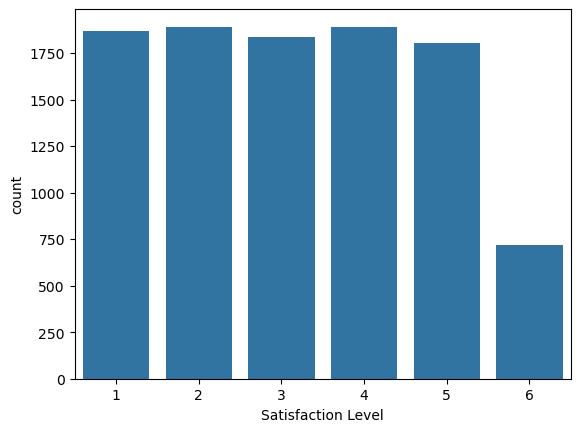

In [160]:
sns.countplot(data=data, x="Satisfaction Level")

In [161]:
data['Satisfaction Level'] = data['Satisfaction Level'].replace(6, np.nan)

### Handling Outliers in Approximate Annual Income

For the `Approximate Annual Income` column, each row provides an estimate of a patient's income per consultation.  
We took a slightly different approach to outlier handling to preserve meaningful information while removing erroneous entries.

For each `PatientID`, we identified per-consultation income estimates that were outliers using the IQR method.  
This allows us to remove unrealistic income guesses while keeping valid low-income patients (e.g., children) and genuine high earners intact.  

By applying this **within-patient outlier detection**, we maintain a realistic distribution of incomes without discarding important information, ensuring that feature engineering (such as computing mean income per patient) is not skewed by extreme per-consultation errors.

 

In [162]:
def identify_income_outliers(df, iqr_multiplier=1.5):
    """
    Identifies outliers in Approximate Annual Income for each Patient ID using the IQR method.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing 'Approximate Annual Income' and 'Patient ID' columns
    iqr_multiplier : float, default=1.5
        Multiplier for IQR to define outlier boundaries
        
    Returns:
    --------
    list
        List of indexes where outliers are located
    """
    outlier_indexes = []
    
    # Group by Patient ID
    for patient_id, group in df.groupby('Patient ID'):
        # Get the income values for this patient
        incomes = group['Approximate Annual Income']
        
        # Calculate Q1, Q3, and IQR
        Q1 = incomes.quantile(0.25)
        Q3 = incomes.quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        # Identify outliers for this patient
        patient_outliers = group[(incomes < lower_bound) | (incomes > upper_bound)].index.tolist()
        outlier_indexes.extend(patient_outliers)
    
    return outlier_indexes

# Usage example:
# outlier_indices = identify_income_outliers(data[["Approximate Annual Income", "Patient ID"]])

In [163]:
data.iloc[identify_income_outliers(data[["Approximate Annual Income", "Patient ID"]]),-3]=np.nan

<Axes: xlabel='Approximate Annual Income', ylabel='Count'>

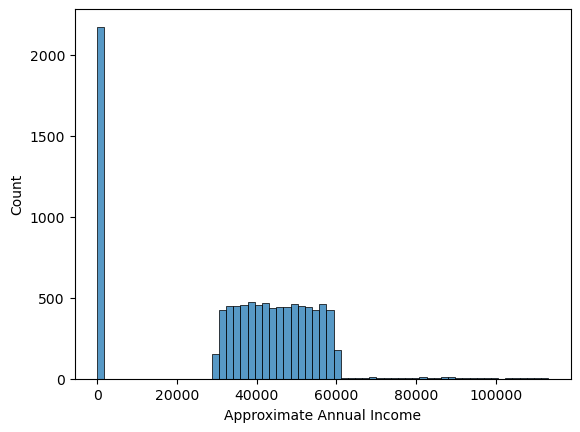

In [164]:
sns.histplot(data=data, x="Approximate Annual Income")

### Handling Outliers in Consultation Price

For the `Consultation Price` column, we capped values greater than 500 by assigning them `NaN`.  
This threshold is slightly higher than Q3 + 1.5 * IQR but was chosen because extremely high prices did not align with the corresponding `Insurance Coverage`.  

By applying this cap, we removed clearly incorrect observations while preserving realistic values.  
This ensures that future feature engineering, such as calculating average consultation price per patient, will not be skewed by erroneous entries.


In [165]:
data.iloc[data[data["Consultation Price"]>500].index,:]

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
333,1373,90.0,Other,London,Retired,NaN,NaN,Master,Widowed,2024-05-27,Endocrinology,120.0,1.0,46005.0,26399.893442,0.000000
575,1313,1.0,Male,Glasgow,Student,NaN,Hypertension,Pre-school,Single,2024-05-24,Neurology,116.0,4.0,0.0,25899.550725,0.000000
660,1292,52.0,Other,London,Teacher,NaN,Heart Disease,Undergraduate,Widowed,2024-06-26,Emergency,86.0,4.0,46950.0,39999.222018,0.000000
1685,1029,NaN,Male,Dublin,Student,NaN,Cancer,High school,Single,2024-02-29,Neurology,18.0,4.0,0.0,26799.937054,0.000000
1777,1005,60.0,Female,Edinburgh,Teacher,NaN,NaN,Master,Widowed,2024-06-04,Emergency,16.0,1.0,42941.0,39400.177964,0.000000
3189,1175,82.0,Other,Glasgow,Retired,Provider A,Heart Disease,Undergraduate,Widowed,2024-06-06,Emergency,86.0,2.0,38750.0,39999.176745,319.341396
5997,1445,97.0,Male,Edinburgh,Retired,Provider C,Diabetes,Undergraduate,Widowed,2024-02-21,Cardiology,98.0,1.0,39993.0,25300.794249,177.655974


In [166]:
data.iloc[data[data["Consultation Price"]>500].index,-2]=np.nan

In [167]:
data_no_outliers=data.copy()

### Visualizing the Data After Outlier Handling

After filtering the outliers using the IQR method, we re-examined the distribution of the numeric variables.  
Boxplots were generated again to visualize the data without outliers, allowing us to confirm that extreme values had been removed and to better understand the central tendency and spread of each variable.


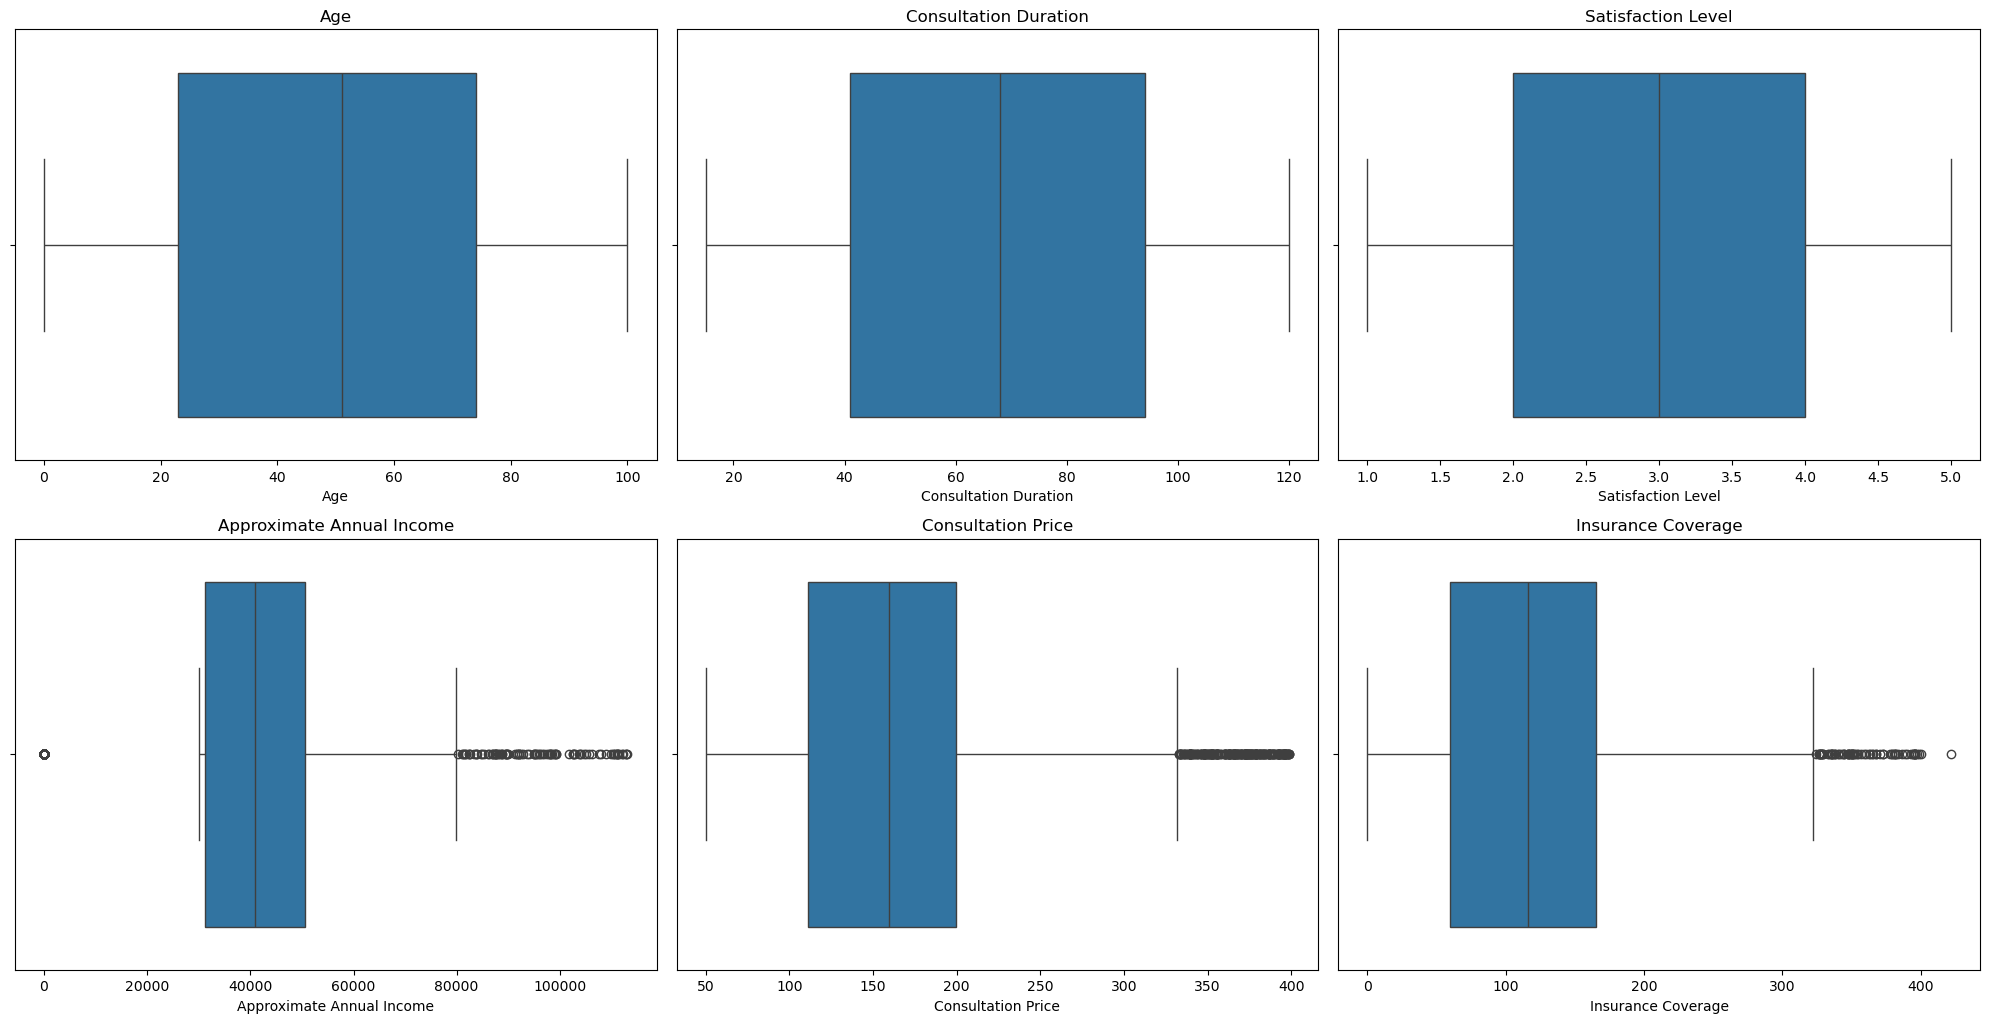

In [168]:
numeric_cols = data_no_outliers.select_dtypes(include='number').columns[1:]


plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):


    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(data=data_no_outliers,x=col)
    
    plt.title(col)
plt.tight_layout()


plt.show()

### Verification of Missing Values

By visualizing the dataset after outlier removal and manual cleaning, we can confirm that all missing values have been addressed and no null entries remain. This ensures that the dataset is complete and ready for further analysis.


In [169]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        9952 non-null   float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         8098 non-null   object        
 6   Family History             8015 non-null   object        
 7   Education Level            9979 non-null   object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      9998 non-null   float64       
 12  Sati

In [170]:
data_no_outliers

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110.0,2.0,38839.0,293.014042,0.000000
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76.0,4.0,52219.0,287.208982,0.000000
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17.0,5.0,41491.0,241.254507,0.000000
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15.0,3.0,34944.0,221.177483,0.000000
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99.0,1.0,39248.0,219.743794,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,1013,92.0,Female,Dublin,Retired,NaN,Cancer,Undergraduate,Divorced,2024-06-28,General Practice,74.0,2.0,52082.0,75.489076,52.842353
10004,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-05-13,General Practice,79.0,NaN,0.0,66.634595,0.000000
10005,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-01-19,General Practice,96.0,NaN,0.0,55.060415,0.000000
10006,1012,7.0,Other,Dublin,Student,NaN,Hypertension,Elementary school,Single,2024-05-24,General Practice,99.0,NaN,0.0,50.322583,0.000000


### Partitioning the Dataset by Patient ID

Upon examining the dataset, we observed that some variables are repeated for each patient because there is an entry for every hospital visit. For example, patient information such as Age, Gender, and City of Residence remains the same across multiple visits, while other variables, such as visit-specific measurements, change with each visit.  

To facilitate missing value handling and to prepare for Part B of the project, we partitioned the dataset into two separate dataframes:  

- **`data_id`**: Contains information that is expected to remain constant for each patient (e.g., Age, Gender, City of Residence).  
- **`data_visit`**: Contains visit-specific information that can vary between visits for the same patient.  

This partitioning allows us to handle missing values and analyze repeated versus dynamic variables more effectively.


In [171]:
data_id=data_no_outliers.drop(["Visit Date", "Department", "Consultation Duration", "Satisfaction Level", "Approximate Annual Income", "Consultation Price", "Insurance Coverage"] ,axis=1)
data_visit=data_no_outliers[["Patient ID", "Visit Date", "Department", "Consultation Duration", "Satisfaction Level", "Approximate Annual Income", "Consultation Price", "Insurance Coverage"]]

### Handling Missing Values in `data_id`

In `data_id`, handling missing values is simplified by the fact that each row corresponds to the same patient.  
If a certain column has a missing value for a patient in one observation but the same information is present in another observation for the same patient, we can assume that the value has not changed.  
Therefore, we can use the available values from other observations of the same patient to fill in the missing entries. This ensures a more complete dataset without introducing inconsistencies.
So taking advantage of that, the following code fills all missing values with the values with the same Patient ID


In [172]:
cols_to_fill = data_id.columns  # whatever columns need filling

for col in cols_to_fill:
    data_id[col] = data_id.groupby("Patient ID")[col].transform(
        lambda x: x.ffill().bfill()
    )


C:\Users\afons\AppData\Local\Temp\ipykernel_30596\2119098437.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.ffill().bfill()


### Handling Inconsistent Patient Information

While attempting to merge all columns by Patient ID, we identified three rows where the same Patient ID had conflicting values for Gender.  
To resolve these inconsistencies, we manually corrected the Gender values for these three rows.  
This step ensures that each patient has consistent demographic information across the dataset.


In [173]:
data_id.loc[data_id["Patient ID"] == 1050, "Gender"] = "Other"
data_id.loc[data_id["Patient ID"] == 1307, "Gender"] = "Other"
data_id.loc[data_id["Patient ID"] == 1447, "Gender"] = "Other"

### Removing Duplicate Rows

Now that all rows corresponding to the same Patient ID have consistent values, we can remove duplicate entries.  
This ensures that `data_id` contains only one row per patient, simplifying further analysis and preventing redundancy and we can add Patient ID as the index.


In [174]:
data_id=data_id.drop_duplicates()

In [175]:
data_id.value_counts("Patient ID")

Patient ID
1140    2
1349    2
1332    2
1322    2
1488    2
       ..
1162    1
1161    1
1160    1
1159    1
1499    1
Name: count, Length: 500, dtype: int64

In [176]:
data_id.set_index("Patient ID", inplace=True)

In [177]:
data_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 1482 to 1013
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 508 non-null    float64
 1   Gender              508 non-null    object 
 2   City of Residence   508 non-null    object 
 3   Profession          508 non-null    object 
 4   Insurance Provider  415 non-null    object 
 5   Family History      407 non-null    object 
 6   Education Level     508 non-null    object 
 7   Marital Status      508 non-null    object 
dtypes: float64(1), object(7)
memory usage: 35.7+ KB


### Finalizing `data_id` and Handling Remaining Missing Values

Now that `data_id` contains one row per patient with consistent values across all columns, we address the remaining missing values in the categorical variables `Family History` and `Insurance Provider`.  

For both variables, missing entries were replaced with an `"Unknown"` category. This approach preserves the fact that the information was missing without introducing potentially incorrect assumptions, ensuring the dataset is complete and ready for further analysis.


In [178]:
cols = ["Insurance Provider", "Family History"]
data_id[cols] = data_id[cols].fillna("Unknown")


In [179]:
data_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 1482 to 1013
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 508 non-null    float64
 1   Gender              508 non-null    object 
 2   City of Residence   508 non-null    object 
 3   Profession          508 non-null    object 
 4   Insurance Provider  508 non-null    object 
 5   Family History      508 non-null    object 
 6   Education Level     508 non-null    object 
 7   Marital Status      508 non-null    object 
dtypes: float64(1), object(7)
memory usage: 35.7+ KB


### Feature Engineering for `data_visit`

For `data_visit`, we performed feature engineering to aggregate visit-level information per patient.  

Most columns were straightforward: for the variables consultation duration, satisfaction level, insurance coverage, Approximate Annual Income and Consultation Price, we used the **mean** as an aggregator. This provides a representative point estimate for each patient.  

However, `Visit Date` and `Department` required special handling. These columns contain specific information about each appointment and cannot be simply averaged without losing important context. To retain meaningful insights:  

- **Visit Date**: We aggregated using **count** to determine how many times each patient visited the hospital.  
- **Department**: We counted the **number of unique departments** visited per patient to capture variability in hospital visits.  

This approach allows us to interpret patterns such as patients with many visits concentrated in a few departments versus patients with many visits across multiple departments.  

Note: This aggregation loses the exact dates and specific departments of individual visits. If we need detailed information at the visit level, we must refer back to the `data_visit` dataframe or even the original `data` dataframe.


In [180]:
data_visit_grouped=data_visit.groupby("Patient ID").agg({"Visit Date" :"count",
                                      "Department" :"nunique",
                                      "Consultation Duration":"mean",
                                      "Satisfaction Level":"mean",
                                      "Approximate Annual Income":"mean",
                                      "Consultation Price": "mean",
                                      "Insurance Coverage":"mean"}
                                     )

In [181]:
data_visit_grouped

,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
Patient ID,,,,,,,
1000,20,10,65.700000,2.600000,43667.250000,175.201749,175.201749
1001,16,10,60.500000,2.769231,44214.437500,149.811613,104.868129
1002,18,10,71.055556,3.352941,0.000000,162.180823,113.526576
1003,25,11,61.400000,3.086957,42628.625000,179.444533,143.555626
1004,26,9,62.653846,3.043478,0.000000,172.543948,155.289553
...,...,...,...,...,...,...,...
1495,21,12,71.809524,3.333333,46714.428571,190.108378,190.108378
1496,18,12,58.666667,2.866667,0.000000,157.621340,141.859206
1497,26,12,68.280000,2.920000,45602.600000,155.523218,155.523218


In [182]:
data_visit_grouped.columns=["nr of visits", "nr of differnt visits", "mean Consultation Duration", "mean Satisfaction Level", "Approximate Annual Income", "mean Consultation Price", "mean Insurance Coverage"]

data_visit_grouped

,nr of visits,nr of differnt visits,mean Consultation Duration,mean Satisfaction Level,Approximate Annual Income,mean Consultation Price,mean Insurance Coverage
Patient ID,,,,,,,
1000,20,10,65.700000,2.600000,43667.250000,175.201749,175.201749
1001,16,10,60.500000,2.769231,44214.437500,149.811613,104.868129
1002,18,10,71.055556,3.352941,0.000000,162.180823,113.526576
1003,25,11,61.400000,3.086957,42628.625000,179.444533,143.555626
1004,26,9,62.653846,3.043478,0.000000,172.543948,155.289553
...,...,...,...,...,...,...,...
1495,21,12,71.809524,3.333333,46714.428571,190.108378,190.108378
1496,18,12,58.666667,2.866667,0.000000,157.621340,141.859206
1497,26,12,68.280000,2.920000,45602.600000,155.523218,155.523218


### Merging `data_id` and `data_visit`

Finally, we merged `data_id` and `data_visit` to create a comprehensive dataset with all information per patient.  

To ensure consistency and readability:  
- The `Age` column was converted to an integer to correct any rounding issues from previous imputations.  
- All numerical columns were rounded to a reasonable number of decimal places to make the dataset easier to interpret.


In [183]:
data_by_id=data_id.join(data_visit_grouped)

In [184]:
data_by_id["Age"]=data_by_id["Age"].astype("int8")

In [185]:
data_by_id = data_by_id.round(1)

In [186]:
data_by_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 1482 to 1013
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         508 non-null    int8   
 1   Gender                      508 non-null    object 
 2   City of Residence           508 non-null    object 
 3   Profession                  508 non-null    object 
 4   Insurance Provider          508 non-null    object 
 5   Family History              508 non-null    object 
 6   Education Level             508 non-null    object 
 7   Marital Status              508 non-null    object 
 8   nr of visits                508 non-null    int64  
 9   nr of differnt visits       508 non-null    int64  
 10  mean Consultation Duration  508 non-null    float64
 11  mean Satisfaction Level     508 non-null    float64
 12  Approximate Annual Income   508 non-null    float64
 13  mean Consultation Price     508 non-

In [187]:
data_by_id

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,nr of visits,nr of differnt visits,mean Consultation Duration,mean Satisfaction Level,Approximate Annual Income,mean Consultation Price,mean Insurance Coverage
Patient ID,,,,,,,,,,,,,,,
1482,65,Female,Birmingham,Retired,Unknown,Heart Disease,Master,Divorced,22,9,63.7,3.2,47897.2,169.6,0.0
1472,72,Other,Edinburgh,Retired,Unknown,Heart Disease,Undergraduate,Married,18,9,80.6,2.6,42852.6,200.0,0.0
1471,47,Other,Birmingham,Lawyer,Unknown,Diabetes,Master,Divorced,17,9,59.1,2.8,47826.5,173.6,0.0
1464,50,Male,Birmingham,Doctor,Unknown,Diabetes,Master,Married,14,9,60.1,3.2,44259.9,181.1,0.0
1456,30,Female,Glasgow,Lawyer,Unknown,Diabetes,Master,Single,28,12,71.9,3.4,44920.8,157.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,24,Male,Dublin,Artist,Provider D,Cancer,Undergraduate,Single,18,8,68.8,3.2,44635.4,147.3,147.3
1020,11,Female,Birmingham,Student,Provider D,Diabetes,Middle school/junior high,Single,21,11,67.6,2.6,0.0,167.8,167.8
1000,58,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,10,65.7,2.6,43667.2,175.2,175.2


### Recovering Department-Level Information

Because aggregating `data_visit` caused the loss of specific department information, we reconstructed this detail by creating dummy variables.  
For each department, we generated a feature indicating the number of times a patient visited that department.  
These dummy variables were then merged back into the final dataset, allowing us to retain department-level visit patterns while keeping the data in a single row per patient format.


In [188]:
dummies = pd.get_dummies(data_no_outliers["Department"], prefix='Department of')
data_no_outliers_dumies = pd.concat([data_no_outliers, dummies], axis=1)

In [189]:
data_no_outliers_dumies=pd.concat([data_no_outliers_dumies["Patient ID"],data_no_outliers_dumies.iloc[:,16:]], axis=1)

In [190]:
data_no_outliers_dumies=data_no_outliers_dumies.groupby("Patient ID").sum()

In [191]:
data_no_outliers_dumies

,Department of_Allergology,Department of_Cardiology,Department of_Dermatology,Department of_ENT,Department of_Emergency,Department of_Endocrinology,Department of_Gastroenterology,Department of_General Practice,Department of_Neurology,Department of_Orthopedics,Department of_Psychiatry,Department of_Pulmonology,Department of_Rheumatology
Patient ID,,,,,,,,,,,,,
1000,3,2,1,1,2,2,0,2,0,0,2,3,2
1001,1,2,0,3,2,1,1,2,1,0,1,0,2
1002,3,0,1,1,0,0,1,1,3,1,5,1,1
1003,1,0,0,2,2,3,1,1,3,2,5,1,4
1004,1,3,0,0,3,2,4,5,5,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,4,1,1,0,1,2,2,2,4,1,1,1
1496,1,2,1,1,2,1,2,3,1,0,2,1,1
1497,2,0,4,1,1,1,3,3,3,2,2,2,2


In [192]:
data_by_id=data_by_id.join(data_no_outliers_dumies)

In [193]:
data_by_id

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,nr of visits,nr of differnt visits,...,Department of_ENT,Department of_Emergency,Department of_Endocrinology,Department of_Gastroenterology,Department of_General Practice,Department of_Neurology,Department of_Orthopedics,Department of_Psychiatry,Department of_Pulmonology,Department of_Rheumatology
Patient ID,,,,,,,,,,,,,,,,,,,,,
1482,65,Female,Birmingham,Retired,Unknown,Heart Disease,Master,Divorced,22,9,...,2,3,1,0,3,3,3,5,0,1
1472,72,Other,Edinburgh,Retired,Unknown,Heart Disease,Undergraduate,Married,18,9,...,2,3,3,1,0,0,0,0,4,2
1471,47,Other,Birmingham,Lawyer,Unknown,Diabetes,Master,Divorced,17,9,...,1,2,1,4,3,0,1,3,0,0
1464,50,Male,Birmingham,Doctor,Unknown,Diabetes,Master,Married,14,9,...,0,1,1,1,2,0,1,3,0,2
1456,30,Female,Glasgow,Lawyer,Unknown,Diabetes,Master,Single,28,12,...,4,1,1,2,3,3,2,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,24,Male,Dublin,Artist,Provider D,Cancer,Undergraduate,Single,18,8,...,1,0,0,0,1,3,0,5,0,2
1020,11,Female,Birmingham,Student,Provider D,Diabetes,Middle school/junior high,Single,21,11,...,1,1,2,3,2,2,2,4,0,2
1000,58,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,10,...,1,2,2,0,2,0,0,2,3,2


##### Finding suspicious zero income records  
We filter rows where `Approximate Annual Income == 0` but `Profession != "Student"` to detect inconsistent records.  
Zero income is a reasonable value for students (or minors). These mismatches are suspicious and require inspection before any corrective action.

In [194]:
data_by_id[(data_by_id["Approximate Annual Income"]==0) & (data_by_id["Profession"]!="Student")]

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,nr of visits,nr of differnt visits,...,Department of_ENT,Department of_Emergency,Department of_Endocrinology,Department of_Gastroenterology,Department of_General Practice,Department of_Neurology,Department of_Orthopedics,Department of_Psychiatry,Department of_Pulmonology,Department of_Rheumatology
Patient ID,,,,,,,,,,,,,,,,,,,,,
1488,11,Female,London,Retired,Provider A,Unknown,Middle school/junior high,Single,19,11,...,1,2,1,3,4,1,0,1,1,3
1479,11,Female,Glasgow,Retired,Provider A,Heart Disease,Middle school/junior high,Single,14,8,...,0,1,0,0,3,1,2,2,1,2
1433,9,Other,Dublin,Teacher,Provider A,Unknown,Elementary school,Single,35,13,...,4,4,2,2,3,2,2,4,1,3
1496,4,Other,Belfast,Retired,Provider B,Hypertension,Pre-school,Single,18,12,...,1,2,1,2,3,1,0,2,1,1
1181,1,Female,London,Lawyer,Provider C,Hypertension,Pre-school,Single,25,11,...,4,2,2,0,3,1,2,3,2,1
1398,5,Female,Glasgow,Doctor,Provider D,Cancer,Kindergarten,Single,20,11,...,2,2,1,1,3,2,0,1,0,4


In [195]:
data_by_id.loc[
    (data_by_id["Approximate Annual Income"] == 0) & 
    (data_by_id["Profession"] != "Student"), 
    "Profession"
] = "Student"

In [196]:
data_by_id[(data_by_id["Approximate Annual Income"]==0) & (data_by_id["Marital Status"]!="Single")]

,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,nr of visits,nr of differnt visits,...,Department of_ENT,Department of_Emergency,Department of_Endocrinology,Department of_Gastroenterology,Department of_General Practice,Department of_Neurology,Department of_Orthopedics,Department of_Psychiatry,Department of_Pulmonology,Department of_Rheumatology
Patient ID,,,,,,,,,,,,,,,,,,,,,
1382,11,Male,Liverpool,Student,Provider A,Heart Disease,Middle school/junior high,Widowed,22,11,...,1,2,0,1,2,0,2,2,2,2
1322,6,Other,Edinburgh,Student,Provider A,Diabetes,Kindergarten,Married,19,10,...,1,1,2,1,3,0,1,4,1,2
1140,11,Other,Edinburgh,Student,Provider C,Heart Disease,Middle school/junior high,Widowed,19,11,...,0,1,2,1,2,1,1,4,3,2
1332,2,Other,Belfast,Student,Provider D,Hypertension,Pre-school,Married,24,11,...,3,0,2,2,2,1,3,0,4,2


In [197]:
data_by_id.loc[
    (data_by_id["Approximate Annual Income"] == 0) & 
    (data_by_id["Profession"] != "Student"), 
    "Profession"
] = "Single"

### Recency
To fully satisfy the 'Recency and activity' requirement, we calculate Recency, defined as the number of days elapsed since the patient's most recent visit.  
The process involves:  
- Establishing a reference date by finding the latest date in the entire dataset and adding one day.
- Grouping the data by Patient ID to find the maximum (max) Visit Date (the last visit date) for each patient.
- Calculating the difference in days between the reference date and the patient's last visit date, resulting in the Recency score.  

This new Recency feature is then joined to the existing patient-level table, data_by_id, completing the Analytic Base Table.

In [198]:
max_visit_date = data_no_outliers['Visit Date'].max()
reference_date = max_visit_date + pd.Timedelta(days=1)

last_visit_df = data_no_outliers.groupby('Patient ID')['Visit Date'].max().reset_index()

# Recency: Days Since Last Visit
last_visit_df['Recency'] = (reference_date - last_visit_df['Visit Date']).dt.days
recency_df = last_visit_df[['Patient ID', 'Recency']].set_index('Patient ID')

# Join the Recency feature to the ABT and finalize data types
data_by_id = data_by_id.join(recency_df)
data_by_id['Recency'] = data_by_id['Recency'].astype('int16')
data_by_id


,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,nr of visits,nr of differnt visits,...,Department of_Emergency,Department of_Endocrinology,Department of_Gastroenterology,Department of_General Practice,Department of_Neurology,Department of_Orthopedics,Department of_Psychiatry,Department of_Pulmonology,Department of_Rheumatology,Recency
Patient ID,,,,,,,,,,,,,,,,,,,,,
1482,65,Female,Birmingham,Retired,Unknown,Heart Disease,Master,Divorced,22,9,...,3,1,0,3,3,3,5,0,1,1
1472,72,Other,Edinburgh,Retired,Unknown,Heart Disease,Undergraduate,Married,18,9,...,3,3,1,0,0,0,0,4,2,2
1471,47,Other,Birmingham,Lawyer,Unknown,Diabetes,Master,Divorced,17,9,...,2,1,4,3,0,1,3,0,0,27
1464,50,Male,Birmingham,Doctor,Unknown,Diabetes,Master,Married,14,9,...,1,1,1,2,0,1,3,0,2,10
1456,30,Female,Glasgow,Lawyer,Unknown,Diabetes,Master,Single,28,12,...,1,1,2,3,3,2,5,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,24,Male,Dublin,Artist,Provider D,Cancer,Undergraduate,Single,18,8,...,0,0,0,1,3,0,5,0,2,1
1020,11,Female,Birmingham,Student,Provider D,Diabetes,Middle school/junior high,Single,21,11,...,1,2,3,2,2,2,4,0,2,6
1000,58,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,10,...,2,2,0,2,0,0,2,3,2,4
